In [31]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
with open('healthcare-claims-prediction_kaggel/patient_data_train.json', 'r') as file:
    train_data_json = json.load(file)
with open('healthcare-claims-prediction_kaggel/patient_data_test.json', 'r') as file:
    test_data_json = json.load(file)

In [33]:
train_claims = pd.read_csv('healthcare-claims-prediction_kaggel/train.csv')

In [34]:
train_claims

PatientID  TotalClaims
0         100041        28424
1         100179        22212
2         100210        44841
3         100794        16506
4         101629        25796
...          ...          ...
14624    7049984        20805
14625    7050524        35728
14626    7051050        21804
14627    7052885        38917
14628    7052987        45027

[14629 rows x 2 columns]

In [35]:
train_data_json

[{'PatientID': 100041,
  'Sex': 'M',
  'Age': 79,
  'Conditions': {'HD': 4, 'HT': 2},
  'Out patient costs': {'2023': 17312,
   '2022': 16769,
   '2021': 16226,
   '2020': 15522,
   '2019': 14819}},
 {'PatientID': 100179,
  'Sex': 'F',
  'Age': 71,
  'Conditions': {'DB': 1, 'HD': 1, 'HT': 1},
  'Out patient costs': {'2023': 14028,
   '2022': 12292,
   '2021': 10557,
   '2020': 8936,
   '2019': 7316}},
 {'PatientID': 100210,
  'Sex': 'F',
  'Age': 84,
  'Conditions': {'AT': 2, 'DB': 4, 'HD': 4, 'HT': 1},
  'Out patient costs': {'2023': 24653,
   '2022': 30431,
   '2021': 31393,
   '2020': 32357,
   '2019': 32206}},
 {'PatientID': 100794,
  'Sex': 'M',
  'Age': 67,
  'Conditions': {'DB': 3, 'HD': 1},
  'Out patient costs': {'2023': 5113}},
 {'PatientID': 101629,
  'Sex': 'M',
  'Age': 72,
  'Conditions': {'DB': 1, 'HD': 2, 'HT': 1},
  'Out patient costs': {'2023': 15652,
   '2022': 14150,
   '2021': 12376,
   '2020': 10602,
   '2019': 8982}},
 {'PatientID': 101901,
  'Sex': 'M',
  'Age':

In [36]:
def normalize_and_clean_data(data):
    '''
    Normalizing and handling the data
    '''
    import warnings
    warnings.filterwarnings("ignore")
    df = pd.json_normalize(data)

    # each patient is unique record,i will be replacing nulls with 0 values

    # so First we will do this for the features related to past years
    df["Out patient costs.2023"].fillna(0,inplace=True)

    df["Out patient costs.2022"].fillna(0,inplace=True)

    df["Out patient costs.2021"].fillna(0,inplace=True)

    df["Out patient costs.2020"].fillna(0,inplace=True)

    df["Out patient costs.2019"].fillna(0,inplace=True)

    df["Conditions.HD"].fillna(0,inplace=True)

    df["Conditions.HT"].fillna(0,inplace=True)

    df["Conditions.DB"].fillna(0,inplace=True)

    df["Conditions.AT"].fillna(0,inplace=True)

    return df

train_data = normalize_and_clean_data(train_data_json)
test_data = normalize_and_clean_data(test_data_json)
    # As we already know, we have only 5 past years to handle the values
    # Now, we need to do the similar kind of analysis for conditions features as well.



In [37]:
train_data

PatientID Sex  Age  Conditions.HD  Conditions.HT  \
0         100041   M   79            4.0            2.0   
1         100179   F   71            1.0            1.0   
2         100210   F   84            4.0            1.0   
3         100794   M   67            1.0            0.0   
4         101629   M   72            2.0            1.0   
...          ...  ..  ...            ...            ...   
14624    7049984   F   78            0.0            3.0   
14625    7050524   F   78            0.0            2.0   
14626    7051050   M   80            0.0            2.0   
14627    7052885   M   66            4.0            0.0   
14628    7052987   M   75            0.0            4.0   

       Out patient costs.2023  Out patient costs.2022  Out patient costs.2021  \
0                     17312.0                 16769.0                 16226.0   
1                     14028.0                 12292.0                 10557.0   
2                     24653.0                 30431.0                 31393.0   
3                      5113.0                     0.0                     0.0   
4                     15652.0                 14150.0                 12376.0   
...                       ...                     ...                     ...   
14624                 10779.0                 10284.0                  9794.0   
14625                 15964.0                 15236.0                 14516.0   
14626                 11477.0                 11326.0                 10964.0   
14627                     0.0                     0.0                     0.0   
14628                 11958.0                 11163.0                 10367.0   

       Out patient costs.2020  Out patient costs.2019  Conditions.DB  \
0                     15522.0                 14819.0            0.0   
1                      8936.0                  7316.0            1.0   
2                     32357.0                 32206.0            4.0   
3                         0.0                     0.0            3.0   
4                     10602.0                  8982.0            1.0   
...                       ...                     ...            ...   
14624                  9306.0                  8723.0            2.0   
14625                 13797.0                 12939.0            2.0   
14626                 10603.0                 10135.0            3.0   
14627                     0.0                     0.0            3.0   
14628                  9567.0                  8768.0            0.0   

       Conditions.AT  
0                0.0  
1                0.0  
2                2.0  
3                0.0  
4                0.0  
...              ...  
14624            0.0  
14625            4.0  
14626            0.0  
14627            3.0  
14628            4.0  

[14629 rows x 12 columns]

From the above data frame we can say now our data is cleaned and ready to perform the further tasks.




Before performing any further tasks, we can merge the output dataframe with train_data

In [40]:
train_data = pd.merge(train_data, train_claims, on='PatientID')

In [41]:
train_data

PatientID Sex  Age  Conditions.HD  Conditions.HT  \
0         100041   M   79            4.0            2.0   
1         100179   F   71            1.0            1.0   
2         100210   F   84            4.0            1.0   
3         100794   M   67            1.0            0.0   
4         101629   M   72            2.0            1.0   
...          ...  ..  ...            ...            ...   
14624    7049984   F   78            0.0            3.0   
14625    7050524   F   78            0.0            2.0   
14626    7051050   M   80            0.0            2.0   
14627    7052885   M   66            4.0            0.0   
14628    7052987   M   75            0.0            4.0   

       Out patient costs.2023  Out patient costs.2022  Out patient costs.2021  \
0                     17312.0                 16769.0                 16226.0   
1                     14028.0                 12292.0                 10557.0   
2                     24653.0                 30431.0                 31393.0   
3                      5113.0                     0.0                     0.0   
4                     15652.0                 14150.0                 12376.0   
...                       ...                     ...                     ...   
14624                 10779.0                 10284.0                  9794.0   
14625                 15964.0                 15236.0                 14516.0   
14626                 11477.0                 11326.0                 10964.0   
14627                     0.0                     0.0                     0.0   
14628                 11958.0                 11163.0                 10367.0   

       Out patient costs.2020  Out patient costs.2019  Conditions.DB  \
0                     15522.0                 14819.0            0.0   
1                      8936.0                  7316.0            1.0   
2                     32357.0                 32206.0            4.0   
3                         0.0                     0.0            3.0   
4                     10602.0                  8982.0            1.0   
...                       ...                     ...            ...   
14624                  9306.0                  8723.0            2.0   
14625                 13797.0                 12939.0            2.0   
14626                 10603.0                 10135.0            3.0   
14627                     0.0                     0.0            3.0   
14628                  9567.0                  8768.0            0.0   

       Conditions.AT  TotalClaims  
0                0.0        28424  
1                0.0        22212  
2                2.0        44841  
3                0.0        16506  
4                0.0        25796  
...              ...          ...  
14624            0.0        20805  
14625            4.0        35728  
14626            0.0        21804  
14627            3.0        38917  
14628            4.0        45027  

[14629 rows x 13 columns]

as the  dataset is a combination of having time series trends with cross sectional difference between the patients.for now as we are just focusing on a single aspect in terms of prediction, we can not completely consider it as time series forecasting. But, let us start with basics applying a linear regression model and before that let us understnad the data from EDA and perform feature engineering if required.

#EDA (Exploratory Data analysis)- to visualize key features of a data set 

In [44]:
train_data.columns

Index(['PatientID', 'Sex', 'Age', 'Conditions.HD', 'Conditions.HT',
       'Out patient costs.2023', 'Out patient costs.2022',
       'Out patient costs.2021', 'Out patient costs.2020',
       'Out patient costs.2019', 'Conditions.DB', 'Conditions.AT',
       'TotalClaims'],
      dtype='object')

In the above data, patientID is a unique feature like a name that just identify a patient. we will drop and store it in a serperate variable.

In [46]:
trian_ID_col = train_data[["PatientID"]]
train_data.drop(["PatientID"],axis=1,inplace=True)
test_ID_col = test_data[["PatientID"]]
test_data.drop(["PatientID"], axis=1,inplace=True)

In [47]:
train_data.head()

Sex  Age  Conditions.HD  Conditions.HT  Out patient costs.2023  \
0   M   79            4.0            2.0                 17312.0   
1   F   71            1.0            1.0                 14028.0   
2   F   84            4.0            1.0                 24653.0   
3   M   67            1.0            0.0                  5113.0   
4   M   72            2.0            1.0                 15652.0   

   Out patient costs.2022  Out patient costs.2021  Out patient costs.2020  \
0                 16769.0                 16226.0                 15522.0   
1                 12292.0                 10557.0                  8936.0   
2                 30431.0                 31393.0                 32357.0   
3                     0.0                     0.0                     0.0   
4                 14150.0                 12376.0                 10602.0   

   Out patient costs.2019  Conditions.DB  Conditions.AT  TotalClaims  
0                 14819.0            0.0            0.0        28424  
1                  7316.0            1.0            0.0        22212  
2                 32206.0            4.0            2.0        44841  
3                     0.0            3.0            0.0        16506  
4                  8982.0            1.0            0.0        25796

In [48]:
#checking for null or missing values in the train_data

In [49]:
train_data.isnull().sum()

Sex                       0
Age                       0
Conditions.HD             0
Conditions.HT             0
Out patient costs.2023    0
Out patient costs.2022    0
Out patient costs.2021    0
Out patient costs.2020    0
Out patient costs.2019    0
Conditions.DB             0
Conditions.AT             0
TotalClaims               0
dtype: int64

zero null values in the training data 

In [51]:
test_data.isnull().sum()

Sex                       0
Age                       0
Conditions.AT             0
Conditions.DB             0
Conditions.HD             0
Conditions.HT             0
Out patient costs.2023    0
Out patient costs.2022    0
Out patient costs.2021    0
Out patient costs.2020    0
Out patient costs.2019    0
dtype: int64

In [52]:
#As we can see there are no null values in the data for now 

In [53]:
# Age column

train_data[["Age"]].value_counts()

Age
70     797
77     796
82     795
67     790
76     784
84     783
69     782
73     778
74     777
81     777
79     770
83     761
72     757
80     753
75     752
66     748
71     747
78     742
68     740
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

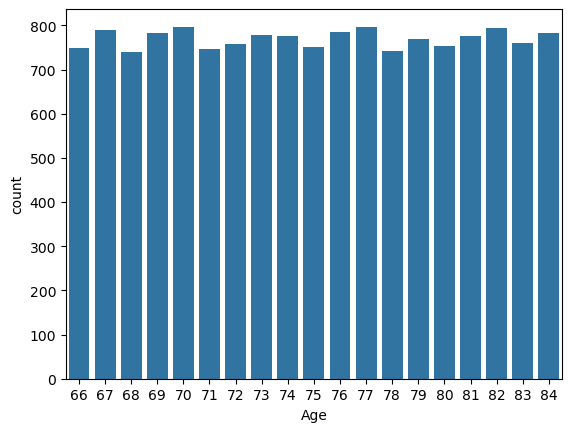

In [54]:
sns.countplot(train_data, x="Age")

The age is from 66 to 84 group and we can say there is no bias in the data with respect to age group as we have similar count for almost every age group

In [56]:
# Sex coloumn

train_data[["Sex"]].value_counts()

Sex
M      7364
F      7265
Name: count, dtype: int64

The ratio is good interms of label count.

<Axes: xlabel='Sex', ylabel='count'>

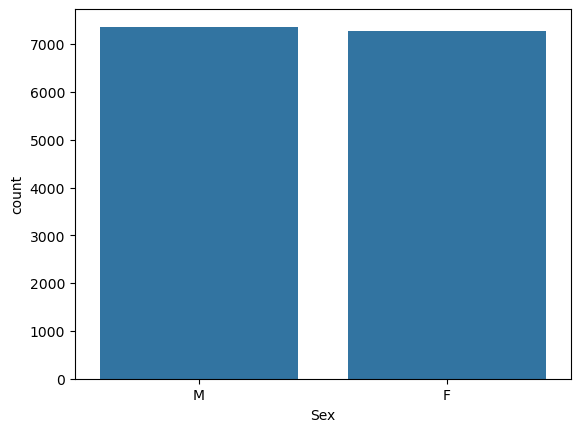

In [58]:
sns.countplot(data = train_data, x="Sex")

In [59]:
# Conditions.HD

train_data[["Conditions.HD"]].value_counts()

Conditions.HD
0.0              5344
1.0              2597
3.0              2254
2.0              2078
4.0              1880
5.0               476
Name: count, dtype: int64

<Axes: xlabel='Conditions.HD', ylabel='count'>

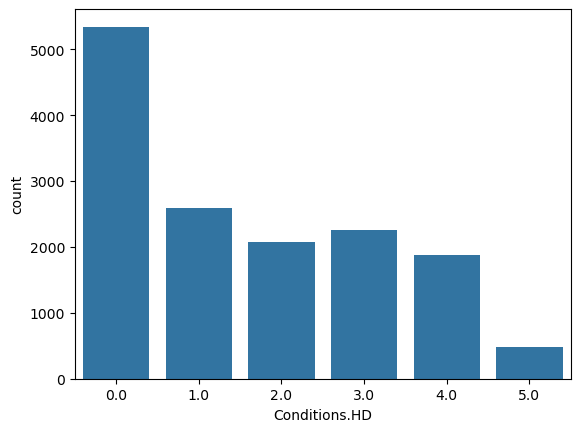

In [60]:
sns.countplot(train_data, x="Conditions.HD")

Here, o label indicates the peopl with no HD condition.

In [62]:
# Conditions.HT
train_data[["Conditions.HT"]].value_counts()

Conditions.HT
0.0              5340
1.0              2628
3.0              2256
2.0              2104
4.0              1847
5.0               454
Name: count, dtype: int64

<Axes: xlabel='Conditions.HT', ylabel='count'>

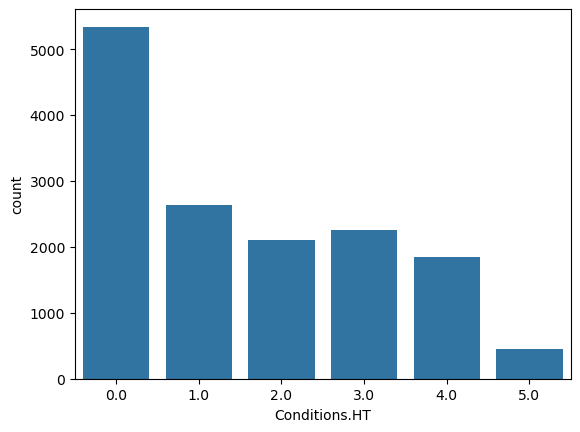

In [63]:
sns.countplot(train_data, x="Conditions.HT")


Here, o label indicates the peopl with no HT condition.

In [65]:
# Conditions.DB

train_data[["Conditions.DB"]].value_counts()

Conditions.DB
0.0              5312
1.0              2655
3.0              2231
2.0              2103
4.0              1841
5.0               487
Name: count, dtype: int64

<Axes: xlabel='Conditions.DB', ylabel='count'>

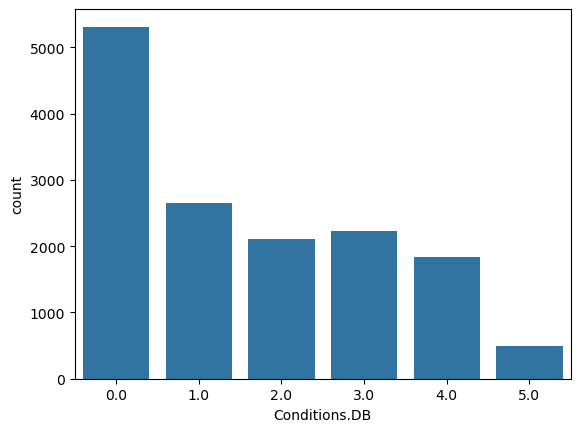

In [66]:
sns.countplot(train_data, x="Conditions.DB")


Almost all these conditions are maintaining similar kind of plots.

In [68]:
# Conditions.At

train_data[["Conditions.AT"]].value_counts()

Conditions.AT
0.0              5321
1.0              2630
3.0              2323
2.0              2096
4.0              1800
5.0               459
Name: count, dtype: int64

<Axes: xlabel='Conditions.AT', ylabel='count'>

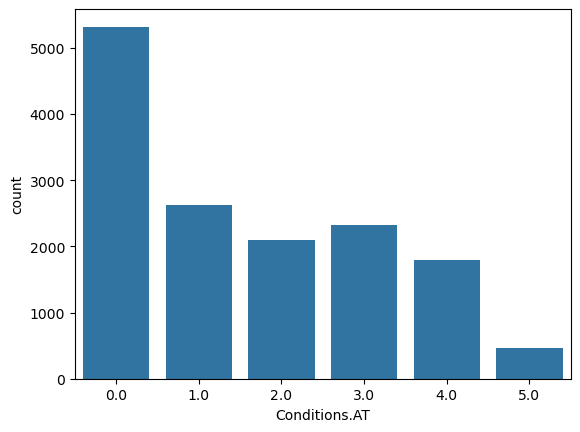

In [69]:
sns.countplot(train_data, x="Conditions.AT")


In [70]:
train_data.columns

Index(['Sex', 'Age', 'Conditions.HD', 'Conditions.HT',
       'Out patient costs.2023', 'Out patient costs.2022',
       'Out patient costs.2021', 'Out patient costs.2020',
       'Out patient costs.2019', 'Conditions.DB', 'Conditions.AT',
       'TotalClaims'],
      dtype='object')

<Axes: xlabel='Out patient costs.2023', ylabel='Count'>

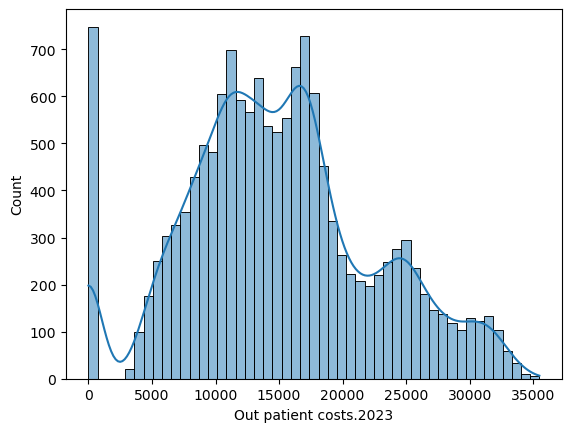

In [71]:
sns.histplot(train_data["Out patient costs.2023"],kde=True)

Here, as we  placed 0 as the replacement for null. For this subission I will be trying out with this.

<Axes: xlabel='Out patient costs.2022', ylabel='Count'>

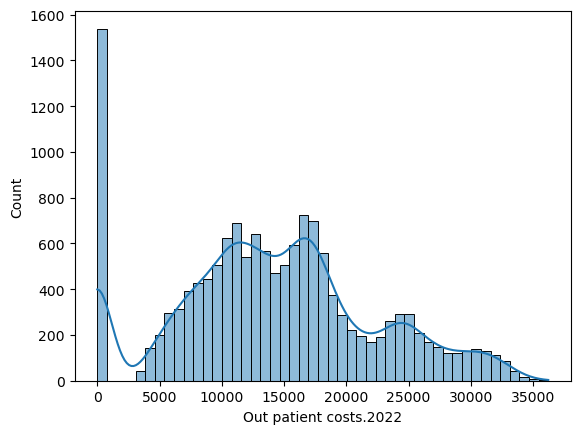

In [73]:
sns.histplot(train_data["Out patient costs.2022"],kde=True)

<Axes: xlabel='Out patient costs.2021', ylabel='Count'>

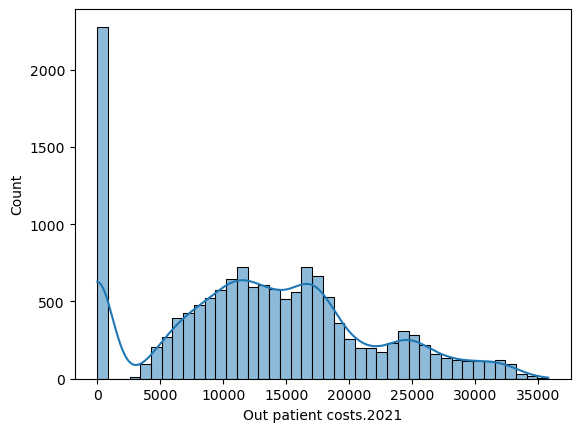

In [74]:
sns.histplot(train_data["Out patient costs.2021"],kde=True)

<Axes: xlabel='Out patient costs.2020', ylabel='Count'>

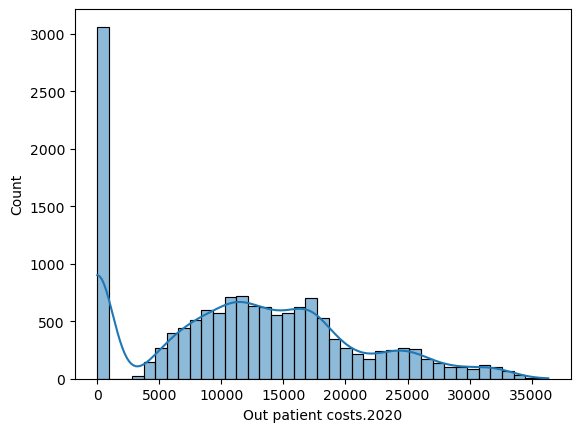

In [75]:
sns.histplot(train_data["Out patient costs.2020"],kde=True)

<Axes: xlabel='Out patient costs.2019', ylabel='Count'>

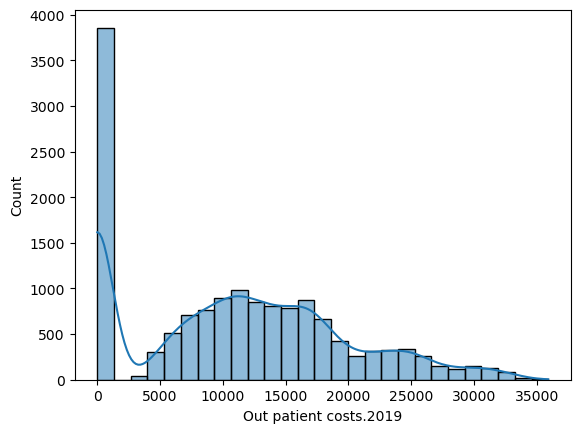

In [76]:
sns.histplot(train_data["Out patient costs.2019"],kde=True)

From the five graphs we can observe the count of 0 being increased from top to down indicating from the years 2019 and 2020 there is not so many outpatient costs.

It says, it can be because if 2 reasons, one is because there is no expense in that year for that patient or, there is an issue of collecting data for that patient in that year.

In [78]:
train_data[["Out patient costs.2019", "Out patient costs.2020", "Out patient costs.2021", "Out patient costs.2022", "Out patient costs.2023"]].describe()

Out patient costs.2019  Out patient costs.2020  Out patient costs.2021  \
count            14629.000000            14629.000000            14629.000000   
mean             10918.203842            12026.909768            13096.098024   
std               8628.038481             8606.416306             8414.363441   
min                  0.000000                0.000000                0.000000   
25%                  0.000000             5976.000000             7621.000000   
50%              10983.000000            11908.000000            12945.000000   
75%              16668.000000            17444.000000            18063.000000   
max              35924.000000            36341.000000            35806.000000   

       Out patient costs.2022  Out patient costs.2023  
count            14629.000000            14629.000000  
mean             14114.555404            14988.528402  
std               8074.650722             7435.628674  
min                  0.000000                0.000000  
25%               8993.000000            10083.000000  
50%              13788.000000            14471.000000  
75%              18601.000000            19116.000000  
max              36222.000000            35485.000000

As the result of missing  data replacement with 0. The box plot would be affected with the 0's. So, in this submission I am not visualising  using  the box plots.

<Axes: xlabel='TotalClaims', ylabel='Count'>

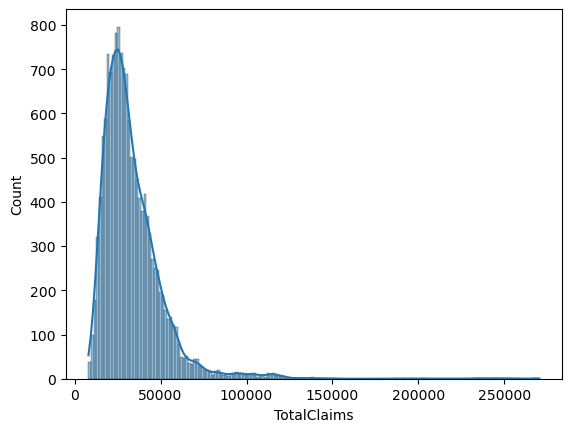

In [80]:
sns.histplot(train_data["TotalClaims"], kde=True)

One key observation is, the Total claims got increased as we can observe the margins of 50000 and 100000 in the x-axis of the plot. 

There, would be no 0 value as it is the target column and patient will have a claim for that year for sure.

In [82]:
train_data


Sex  Age  Conditions.HD  Conditions.HT  Out patient costs.2023  \
0       M   79            4.0            2.0                 17312.0   
1       F   71            1.0            1.0                 14028.0   
2       F   84            4.0            1.0                 24653.0   
3       M   67            1.0            0.0                  5113.0   
4       M   72            2.0            1.0                 15652.0   
...    ..  ...            ...            ...                     ...   
14624   F   78            0.0            3.0                 10779.0   
14625   F   78            0.0            2.0                 15964.0   
14626   M   80            0.0            2.0                 11477.0   
14627   M   66            4.0            0.0                     0.0   
14628   M   75            0.0            4.0                 11958.0   

       Out patient costs.2022  Out patient costs.2021  Out patient costs.2020  \
0                     16769.0                 16226.0                 15522.0   
1                     12292.0                 10557.0                  8936.0   
2                     30431.0                 31393.0                 32357.0   
3                         0.0                     0.0                     0.0   
4                     14150.0                 12376.0                 10602.0   
...                       ...                     ...                     ...   
14624                 10284.0                  9794.0                  9306.0   
14625                 15236.0                 14516.0                 13797.0   
14626                 11326.0                 10964.0                 10603.0   
14627                     0.0                     0.0                     0.0   
14628                 11163.0                 10367.0                  9567.0   

       Out patient costs.2019  Conditions.DB  Conditions.AT  TotalClaims  
0                     14819.0            0.0            0.0        28424  
1                      7316.0            1.0            0.0        22212  
2                     32206.0            4.0            2.0        44841  
3                         0.0            3.0            0.0        16506  
4                      8982.0            1.0            0.0        25796  
...                       ...            ...            ...          ...  
14624                  8723.0            2.0            0.0        20805  
14625                 12939.0            2.0            4.0        35728  
14626                 10135.0            3.0            0.0        21804  
14627                     0.0            3.0            3.0        38917  
14628                  8768.0            0.0            4.0        45027  

[14629 rows x 12 columns]

In [83]:
!pip install scipy

In [84]:
# Let us see the analysis comparision of Sex featuer with Claim totals using paired t test

import scipy.stats as stats

## Null hypothesis: There is no difference in claim costs with respect to gender
# ALternative: There is significant difference in claim costs with respect to gender.


category1 = train_data[train_data['Sex'] == 'M']['TotalClaims']
category2 = train_data[train_data['Sex'] == 'F']['TotalClaims']
t_stat, p_value = stats.ttest_ind(category1, category2)
print(f'T-test statistic: {t_stat}, p-value: {p_value}')



T-test statistic: -0.4181141152479169, p-value: 0.6758698232183946


As p-value>0.05, fail to reject null hypothesis
Based on the t-test, there is not enough evidence to conclude that the average claim scores are significantly different between the two groups at the 5% significance level.

No conclusion


In [86]:
train_data.columns

Index(['Sex', 'Age', 'Conditions.HD', 'Conditions.HT',
       'Out patient costs.2023', 'Out patient costs.2022',
       'Out patient costs.2021', 'Out patient costs.2020',
       'Out patient costs.2019', 'Conditions.DB', 'Conditions.AT',
       'TotalClaims'],
      dtype='object')

In [87]:
train_data.drop(["Sex"],axis=1).corr()

Age  Conditions.HD  Conditions.HT  \
Age                     1.000000       0.004649       0.004198   
Conditions.HD           0.004649       1.000000      -0.102849   
Conditions.HT           0.004198      -0.102849       1.000000   
Out patient costs.2023  0.653123       0.383074       0.003771   
Out patient costs.2022  0.748012       0.333124       0.004422   
Out patient costs.2021  0.797470       0.298640       0.006079   
Out patient costs.2020  0.832342       0.271709       0.006028   
Out patient costs.2019  0.854499       0.245165       0.004286   
Conditions.DB          -0.003114      -0.105135      -0.113834   
Conditions.AT          -0.010463      -0.114855      -0.111116   
TotalClaims             0.182427       0.351597       0.111901   

                        Out patient costs.2023  Out patient costs.2022  \
Age                                   0.653123                0.748012   
Conditions.HD                         0.383074                0.333124   
Conditions.HT                         0.003771                0.004422   
Out patient costs.2023                1.000000                0.971804   
Out patient costs.2022                0.971804                1.000000   
Out patient costs.2021                0.947290                0.981887   
Out patient costs.2020                0.918557                0.959989   
Out patient costs.2019                0.888399                0.935633   
Conditions.DB                         0.119091                0.103474   
Conditions.AT                         0.175915                0.149199   
TotalClaims                           0.521903                0.481973   

                        Out patient costs.2021  Out patient costs.2020  \
Age                                   0.797470                0.832342   
Conditions.HD                         0.298640                0.271709   
Conditions.HT                         0.006079                0.006028   
Out patient costs.2023                0.947290                0.918557   
Out patient costs.2022                0.981887                0.959989   
Out patient costs.2021                1.000000                0.982026   
Out patient costs.2020                0.982026                1.000000   
Out patient costs.2019                0.961121                0.982281   
Conditions.DB                         0.093222                0.083020   
Conditions.AT                         0.132608                0.119130   
TotalClaims                           0.456506                0.432028   

                        Out patient costs.2019  Conditions.DB  Conditions.AT  \
Age                                   0.854499      -0.003114      -0.010463   
Conditions.HD                         0.245165      -0.105135      -0.114855   
Conditions.HT                         0.004286      -0.113834      -0.111116   
Out patient costs.2023                0.888399       0.119091       0.175915   
Out patient costs.2022                0.935633       0.103474       0.149199   
Out patient costs.2021                0.961121       0.093222       0.132608   
Out patient costs.2020                0.982281       0.083020       0.119130   
Out patient costs.2019                1.000000       0.076588       0.109465   
Conditions.DB                         0.076588       1.000000      -0.097261   
Conditions.AT                         0.109465      -0.097261       1.000000   
TotalClaims                           0.408582       0.368768       0.370070   

                        TotalClaims  
Age                        0.182427  
Conditions.HD              0.351597  
Conditions.HT              0.111901  
Out patient costs.2023     0.521903  
Out patient costs.2022     0.481973  
Out patient costs.2021     0.456506  
Out patient costs.2020     0.432028  
Out patient costs.2019     0.408582  
Conditions.DB              0.368768  
Conditions.AT              0.370070  
TotalClaims                1.000000

1. TotalClaims is completely postively correlated with all the features.
2. Age column is being in almost string correlation with out patient costs.

<Axes: >

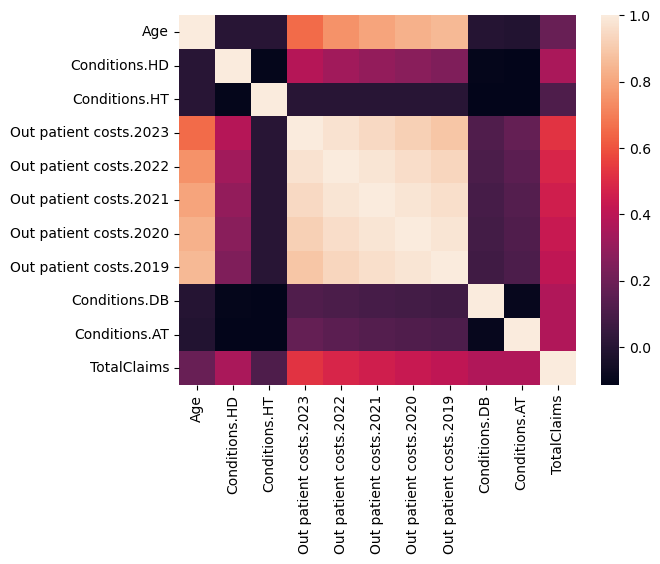

In [89]:
sns.heatmap(train_data.drop(["Sex"],axis=1).corr())

In [90]:
train_data.head()

Sex  Age  Conditions.HD  Conditions.HT  Out patient costs.2023  \
0   M   79            4.0            2.0                 17312.0   
1   F   71            1.0            1.0                 14028.0   
2   F   84            4.0            1.0                 24653.0   
3   M   67            1.0            0.0                  5113.0   
4   M   72            2.0            1.0                 15652.0   

   Out patient costs.2022  Out patient costs.2021  Out patient costs.2020  \
0                 16769.0                 16226.0                 15522.0   
1                 12292.0                 10557.0                  8936.0   
2                 30431.0                 31393.0                 32357.0   
3                     0.0                     0.0                     0.0   
4                 14150.0                 12376.0                 10602.0   

   Out patient costs.2019  Conditions.DB  Conditions.AT  TotalClaims  
0                 14819.0            0.0            0.0        28424  
1                  7316.0            1.0            0.0        22212  
2                 32206.0            4.0            2.0        44841  
3                     0.0            3.0            0.0        16506  
4                  8982.0            1.0            0.0        25796

In [91]:
# converting Sex column into quantitative

In [92]:
from sklearn.preprocessing import LabelEncoder

sc = LabelEncoder()
sc.fit(train_data["Sex"])
train_data["Sex"] = sc.transform(train_data["Sex"])
test_data["Sex"] = sc.transform(test_data["Sex"])

In [93]:
x = train_data.drop(["TotalClaims"],axis=1)
y = train_data[["TotalClaims"]]

In [94]:
# These lines are making both the features in simlar order

temp = test_data[["Conditions.AT","Conditions.DB"]]
test_data.drop(["Conditions.AT","Conditions.DB"], axis=1, inplace=True)
test_data["Conditions.DB"] = temp["Conditions.DB"]
test_data["Conditions.AT"] = temp["Conditions.AT"]

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [96]:
# Sclaing the data

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
test_data = sc.transform(test_data)

In [97]:
x_train.shape

(10240, 11)

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
pred = lr.predict(x_test)

In [100]:
from sklearn.metrics import mean_absolute_error, r2_score
pred_train = lr.predict(x_train)
print("Train MAE ", mean_absolute_error(pred_train, y_train))
print("Test MAE ", mean_absolute_error(pred, y_test))
#print(mean_absolute_error(pred, y_test))

Train MAE  5385.08466596865
Test MAE  5592.039678842805


In [101]:
train_data["TotalClaims"].mean()

33354.54494497232

In [102]:
Relative_mae_train = mean_absolute_error(pred_train, y_train) / train_data["TotalClaims"].mean() * 100
Relative_mae = mean_absolute_error(pred, y_test)/ train_data["TotalClaims"].mean() * 100
#Relative_mae = mean_absolute_error(pred, y_test)/ train_data["TotalClaims"].mean() * 100
#Relative_mae = mean_absolute_error(pred, y_test)/ train_data["TotalClaims"].mean() * 100


In [103]:
print("Relative Train MAE: ", Relative_mae_train)
print("Relative Test MAE: ",Relative_mae)

Relative Train MAE:  16.144980166429672
Relative Test MAE:  16.76545036986247


In [104]:
res = lr.predict(test_data)

In [105]:
test_ID_col["TotalClaims"] = res

In [106]:
test_ID_col

PatientID   TotalClaims
0       7053446  52868.265007
1       7054536  26303.875687
2       7055023  25554.335879
3       7055403  28630.070774
4       7055459  13744.241030
...         ...           ...
6266    9996673  24108.385214
6267    9998161  25876.485353
6268    9998756  26059.589944
6269    9998997  24308.488228
6270    9999900  16670.510507

[6271 rows x 2 columns]

In [107]:
test_ID_col.to_csv("submission.csv" , index = False)